In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import pickle
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [5]:
df=df.replace('basic.4y', 'Basic 4 Years')
df=df.replace('high.school', 'High School')
df=df.replace('basic.6y', 'Basic 6 Years')
df=df.replace('professional.course', 'Professional Course')
df=df.replace('professional.course', 'Professional Course')
df=df.replace('unknown', np.nan)
df=df.replace('university.degree', 'University Degree')
df=df.replace('illiterate', 'Illiterate')

In [6]:
df=df.dropna()

C:\Users\anurag\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


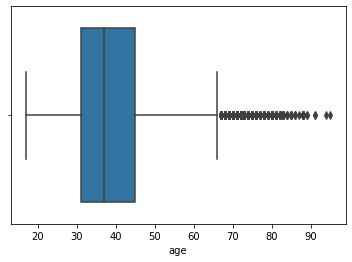

In [7]:
sns.boxplot(df['age'])

C:\Users\anurag\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


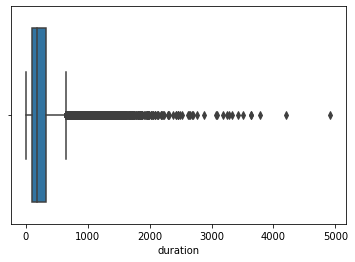

In [8]:
sns.boxplot(df['duration'])

C:\Users\anurag\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


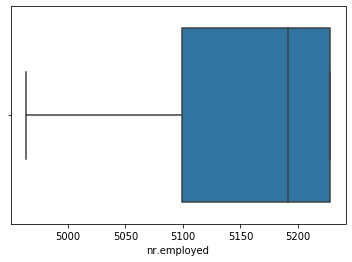

In [9]:
sns.boxplot(df['nr.employed'])

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
Q1_age=df['age'].quantile(0.25)
Q3_age=df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age * 1.5 - IQR_age
upper_age = Q3_age * 1.5 + IQR_age

In [12]:
Q1_duration=df['duration'].quantile(0.25)
Q3_duration=df['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
lower_duration = Q1_duration * 1.5 - IQR_duration
upper_duration = Q3_duration * 1.5 + IQR_duration

In [13]:
Q1_previous=df['previous'].quantile(0.2)
Q3_previous=df['previous'].quantile(0.8)
IQR_previous = Q3_previous - Q1_previous
lower_previous = Q1_previous * 1.5 - IQR_previous
upper_previous = Q3_previous * 1.5 + IQR_previous

In [14]:
lower_previous

0.0

In [15]:
df=df.loc[(df['age'] >= lower_age) & (df['age'] <= upper_age)]
df=df.loc[(df['duration'] >= lower_duration) & (df['duration'] <= upper_duration)]
df=df.loc[(df['previous'] >= lower_previous) & (df['previous'] <= upper_previous)]

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic 4 Years,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,High School,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,Basic 6 Years,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,High School,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,Professional Course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,University Degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,Professional Course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,Professional Course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,University Degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [16]:
df['previous'].unique()

array([0], dtype=int64)

In [17]:
df['duration'].unique()

array([261, 226, 151, 307, 139, 293, 146, 312, 353, 342, 181, 172,  99,
       208, 365, 577, 137, 160, 212, 616, 178, 355, 225, 266, 253, 179,
       357, 232,  91, 158, 200, 349,  20, 529, 192, 188, 180, 545, 583,
       221, 426, 197, 257,  55, 190, 300, 123, 194, 337, 286, 247, 439,
        79, 262,  61, 102, 143, 345, 185, 207, 125, 240, 193, 136, 338,
        87,  98, 186, 579,  85, 506, 292,  93, 128, 107, 303, 270, 228,
       673, 233, 461, 138, 412,  19, 356,  67, 291, 256, 477, 322, 216,
       168, 132,  64, 209, 177, 580, 165, 238, 124,  18, 142, 389, 211,
       117, 370,  46,  50, 361,  73, 150, 611,  89,  10, 118,  92, 189,
        75,  56, 164, 446, 120, 122, 248, 205,  83, 106, 108, 364, 173,
       241, 224, 148, 196, 111, 316, 669, 121, 174,  88, 135, 402, 220,
       254, 503, 680, 130, 113, 195, 347, 404, 396, 229, 350, 379, 210,
       306, 218,  77,  54, 344, 202, 278, 235, 290, 144,  69, 243, 442,
       455, 154, 393, 203, 140, 483, 259, 623, 198, 175, 451, 15

In [18]:
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

In [19]:
x = df.drop(columns='y')
y = df['y']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.9400436767917412

In [22]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


0.9233670835814969

In [23]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9404407385348421

In [24]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_dtc_pred = dtc.predict(x_test)

accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print(accuracy_dtc)

0.9249553305539011


C:\Users\anurag\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [25]:
#clf = svm.SVC()
#clf.fit(x_train, y_train)
#pred = clf.predict(x_test)
#score = metrics.accuracy_score(y_test, pred)
#score